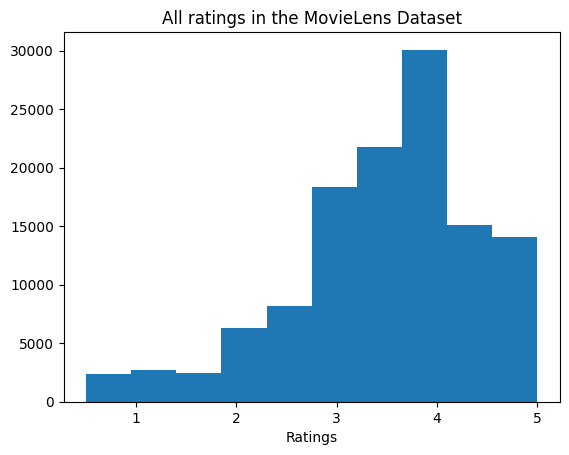

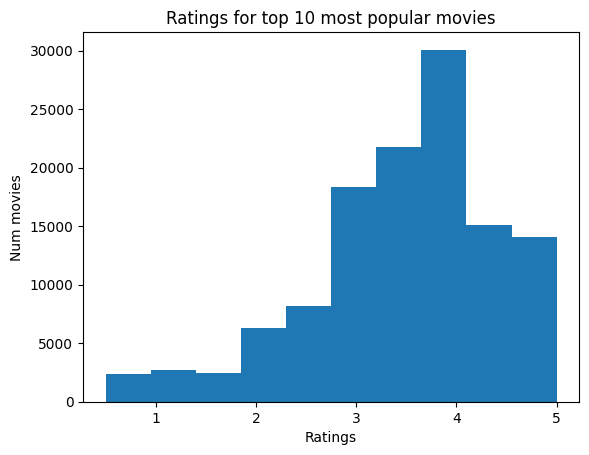

479


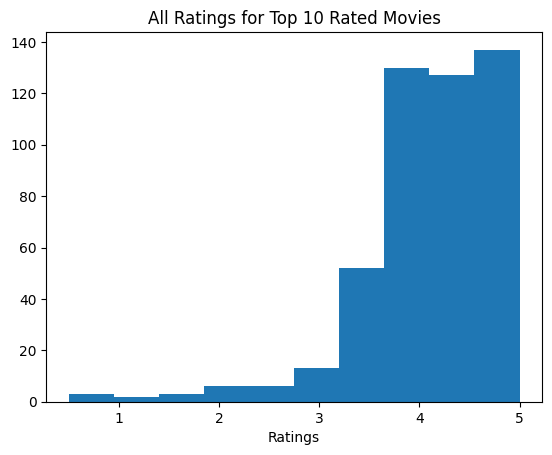

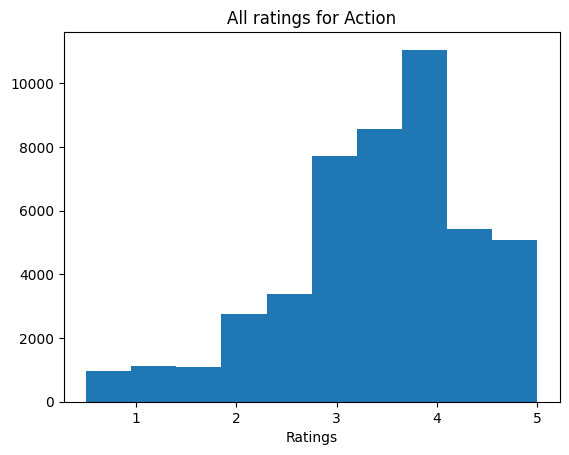

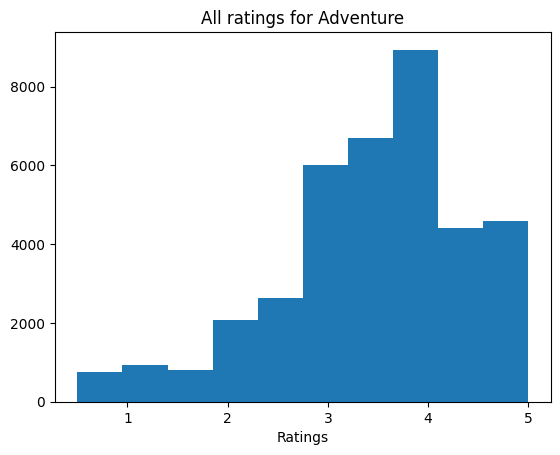

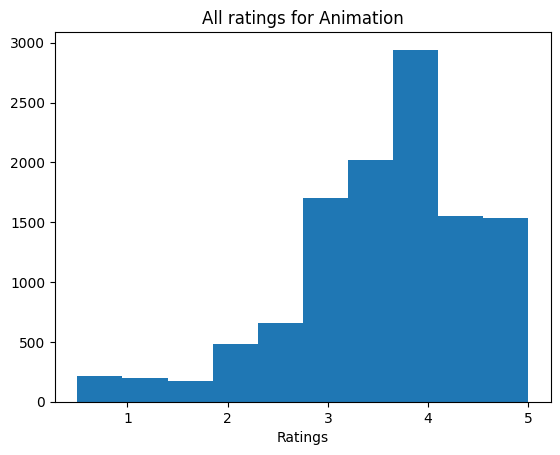

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from utils import read_data, K
from tqdm import tqdm
import seaborn as sns
from utils import read_data
from data_processing import *

In [2]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [3]:
DATA_PATH = 'data/data.csv'
MOVIES_PATH = 'data/movies.csv'

data = pd.read_csv(DATA_PATH, sep=',')
movies = pd.read_csv(MOVIES_PATH, sep=',')
movies['Year'] = movies['Movie Title'].str[-5:].str[:4].astype('int') 

In [4]:
movies

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,0,(500) Days of Summer (2009),0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,2009
1,1,10 Cloverfield Lane (2016),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2016
2,2,"10,000 BC (2008)",0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2008
3,3,12 Years a Slave (2013),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2013
4,4,127 Hours (2010),0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,Zoolander (2001),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2001
1496,1496,Zootopia (2016),0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2016
1497,1497,[REC] (2007),0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2007
1498,1498,xXx (2002),0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2002


In [5]:
movies.max()['Year']

2018

In [6]:
movies.min()['Year']

2001

(array([262., 114., 120., 225., 104.,  97., 176.,  75.,  66., 134.,  54.,
         45.,  28.]),
 array([2001.        , 2002.30769231, 2003.61538462, 2004.92307692,
        2006.23076923, 2007.53846154, 2008.84615385, 2010.15384615,
        2011.46153846, 2012.76923077, 2014.07692308, 2015.38461538,
        2016.69230769, 2018.        ]),
 <BarContainer object of 13 artists>)

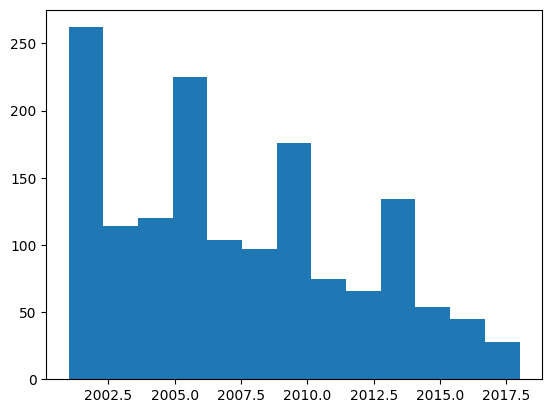

In [7]:
plt.hist(movies['Year'], bins='auto')

In [8]:
def getGenre(genre, yes=1):
    return movies.loc[movies[genre]==yes]["Movie ID"].to_numpy(), movies.loc[movies[genre]==yes]["Movie Title"].to_numpy()



In [9]:
getGenre("Sci-Fi")

(array([  11,   12,   20,   21,   34,   37,   38,   39,   47,   50,   51,
          58,   62,   83,   85,   86,   94,   99,  103,  104,  105,  106,
         113,  124,  125,  127,  128,  129,  130,  157,  158,  162,  209,
         213,  217,  218,  219,  245,  246,  248,  252,  257,  263,  265,
         269,  279,  283,  287,  288,  292,  315,  316,  317,  318,  320,
         321,  323,  343,  344,  346,  350,  359,  360,  365,  368,  371,
         381,  385,  388,  396,  399,  406,  409,  414,  415,  427,  428,
         429,  442,  443,  457,  477,  478,  479,  480,  481,  482,  494,
         495,  496,  497,  500,  505,  507,  521,  524,  528,  533,  534,
         548,  570,  572,  582,  588,  593,  599,  613,  617,  618,  624,
         626,  634,  643,  647,  649,  651,  652,  663,  666,  676,  677,
         678,  680,  689,  692,  701,  708,  712,  714,  715,  716,  722,
         746,  753,  772,  785,  787,  797,  802,  818,  820,  832,  833,
         849,  850,  852,  859,  860, 

In [10]:
def getYearRange(start, end):
    before = movies.loc[movies['Year'] < end] 
    return before.loc[before['Year']>=start]["Movie ID"].to_numpy(), before.loc[before['Year']>=start]["Movie Title"].to_numpy()




Lets try plotting some rangeful things :)

In [11]:
from bias_model import *

In [12]:
from utils import read_data
data, movies = read_data()
U, V, a, b = get_U_V_a_b(data)

num_users, num_movies = compute_num_users_and_movies(data)
eta = 0.03
reg = 0.1
eps = 0.0001
max_epochs = 300
data_as_numpy = data.to_numpy(copy=True).astype(int)

A, S, B = np.linalg.svd(V)
approx_V = np.dot(A[:, :2].T, V)
approx_U = np.dot(A[:, :2].T, U)

In [13]:
print(approx_U[:, 1])
print(approx_U)

[-0.05170033 -0.18979168]
[[-0.17806688 -0.05170033 -0.28087749 ... -0.08605366 -0.75220363
  -0.14861052]
 [-0.27767535 -0.18979168  0.08135085 ... -0.10709607  0.14866337
  -0.25806638]]


[   5    7   10   12   14   17   18   20   23   26   29   31   33   37
   38   40   42   46   52   54   55   56   59   60   63   64   67   72
   73   76   78   79   81   82   83   84   88   89   93   97  101  107
  114  115  116  118  120  121  122  129  134  140  143  144  148  149
  155  156  161  163  166  168  169  170  180  182  184  195  196  197
  201  202  204  206  207  209  212  214  220  223  229  230  231  232
  233  234  236  241  242  244  247  252  255  258  262  268  270  271
  272  273  275  281  283  284  287  291  295  297  299  301  303  306
  307  312  314  316  325  336  339  341  342  343  347  351  352  353
  354  358  359  362  363  364  368  369  373  374  378  380  387  388
  390  391  395  401  402  406  409  410  414  421  431  435  440  442
  443  445  446  453  457  462  463  464  465  466  467  469  483  484
  485  490  492  495  497  498  502  506  512  515  516  517  531  545
  552  553  559  560  561  564  565  567  569  573  574  586  596  600
  603 

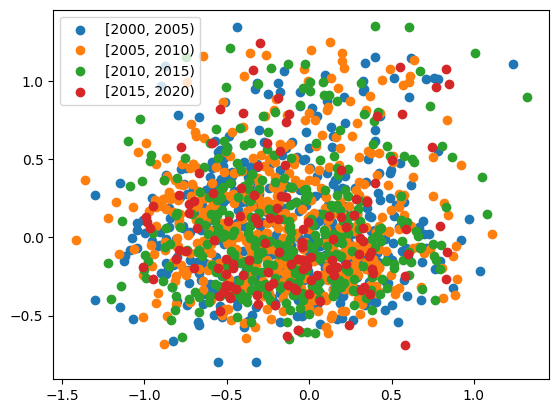

In [14]:
movies['Year'] = movies['Movie Title'].str[-5:].str[:4].astype('int') 
years = [2000,2005,2010,2015,2020]
fig = plt.figure()
ax1 = fig.add_subplot(111)
for y in range(len(years)-1):
    to_viz_np = []
    points, titles = getYearRange(years[y], years[y+1])
    print(points)
    for i in points:
        to_viz_np.append(approx_V[:,i])
    
    to_viz_np = np.array(to_viz_np)
    to_viz_df = pd.DataFrame(to_viz_np, columns = ['x', 'y'])
    ax1.scatter(to_viz_df['x'],to_viz_df['y'], label = "["+str(years[y])+", "+str(years[y+1])+")")
plt.legend(loc='upper left')

OK how about some genres?

In [15]:
to_viz_np = []
points, titles = getGenre(genre)
points = points[20:30]
titles = titles[20:30]
for i in points:
    to_viz_np.append(approx_V[:,i])
    
to_viz_np = np.array(to_viz_np)
to_viz_df = pd.DataFrame(to_viz_np, columns = ['x', 'y'])
to_viz_df['title'] = titles
to_viz_df

NameError: name 'genre' is not defined

In [23]:
def getGenre2(genre1,genre2, yes=1):
    return movies.loc[movies[genre1]==yes && movies[genre2]!=yes]["Movie ID"].to_numpy(), movies.loc[movies[genre1]==yes && movies[genre2]!=yes]["Movie Title"].to_numpy()


getGenre2("Romance","Horror")

SyntaxError: invalid syntax (2829825744.py, line 2)

In [25]:
import plotly.express as px

genres = ["Children", "Romance"]
# fig = plt.figure()
# ax1 = fig.add_subplot(111)
to_plt_df = pd.DataFrame()
for i in range(len(genres)):
    genre = genres[i]
    to_viz_np = []
    points, titles = getGenre(genre)
    for i in points:
        to_viz_np.append(approx_V[:,i])
    
    to_viz_np = np.array(to_viz_np)
    to_viz_df = pd.DataFrame(to_viz_np, columns = ['x', 'y'])
    to_viz_df['title'] = titles
    to_viz_df['genre'] = genre

    to_plt_df = pd.concat([to_plt_df, to_viz_df], ignore_index=True, sort=False)

    # print(to_viz_df)
fig = px.scatter(to_plt_df, x='x', y='y', color='genre',
                 hover_data={'x':False, # remove species from hover data
                             'y':False, # remove species from hover data
                             'title':True, # add other column, default formatting
                             'genre':False # add other column, default formatting
                            })
fig.show()

In [22]:
import plotly.express as px

genres = ["Romance", "Horror"]
genresinv = ["Horror","Romance"]
# fig = plt.figure()
# ax1 = fig.add_subplot(111)
to_plt_df = pd.DataFrame()
for i in range(len(genres)):
    genre = genres[i]
    to_viz_np = []
    points, titles = getGenre2(genre,genresinv[i])
    for i in points:
        to_viz_np.append(approx_V[:,i])
    
    to_viz_np = np.array(to_viz_np)
    to_viz_df = pd.DataFrame(to_viz_np, columns = ['x', 'y'])
    to_viz_df['title'] = titles
    to_viz_df['genre'] = genre

    to_plt_df = pd.concat([to_plt_df, to_viz_df], ignore_index=True, sort=False)

    # print(to_viz_df)
fig = px.scatter(to_plt_df, x='x', y='y', color='genre',
                 hover_data={'x':False, # remove species from hover data
                             'y':False, # remove species from hover data
                             'title':True, # add other column, default formatting
                             'genre':False # add other column, default formatting
                            })
fig.show()

/var/folders/8f/167j3z857g1cpb6_79vckdjc0000gn/T/ipykernel_48073/3311195007.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/8f/167j3z857g1cpb6_79vckdjc0000gn/T/ipykernel_48073/3311195007.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Suprise Model Vis

In [ ]:
from surprise_nmf import get_U_V
from surprise import NMF
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data, movies = read_data()
model = NMF()
U, V = get_U_V(NMF, data)
Y = np.dot(U.T, V)
A, S, B = np.linalg.svd(V)
approx_V = np.dot(A[:, :2].T, V)
approx_U = np.dot(A[:, :2].T, U)
movies['Year'] = movies['Movie Title'].str[-5:].str[:4].astype('int') 

<matplotlib.legend.Legend>

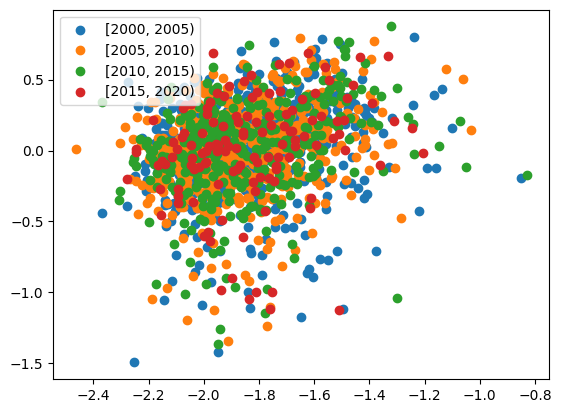

In [ ]:
years = [2000,2005,2010,2015,2020]
fig = plt.figure()
ax1 = fig.add_subplot(111)
for y in range(len(years)-1):
    to_viz_np = []
    points, titles = getYearRange(years[y], years[y+1])
    for i in points:
        to_viz_np.append(approx_V[:,i])
    
    to_viz_np = np.array(to_viz_np)
    to_viz_df = pd.DataFrame(to_viz_np, columns = ['x', 'y'])
    ax1.scatter(to_viz_df['x'],to_viz_df['y'], label = "["+str(years[y])+", "+str(years[y+1])+")")
plt.legend(loc='upper left')

<matplotlib.legend.Legend>

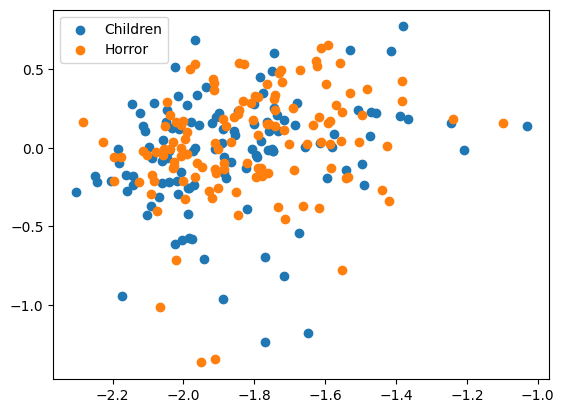

In [ ]:
genres = ["Children", "Horror"]
fig = plt.figure()
ax1 = fig.add_subplot(111)
for genre in genres:
    to_viz_np = []
    points, titles = getGenre(genre)
    for i in points:
        to_viz_np.append(approx_V[:,i])
    
    to_viz_np = np.array(to_viz_np)
    to_viz_df = pd.DataFrame(to_viz_np, columns = ['x', 'y'])
    ax1.scatter(to_viz_df['x'],to_viz_df['y'], label = genre)
plt.legend(loc='upper left')

<matplotlib.legend.Legend>

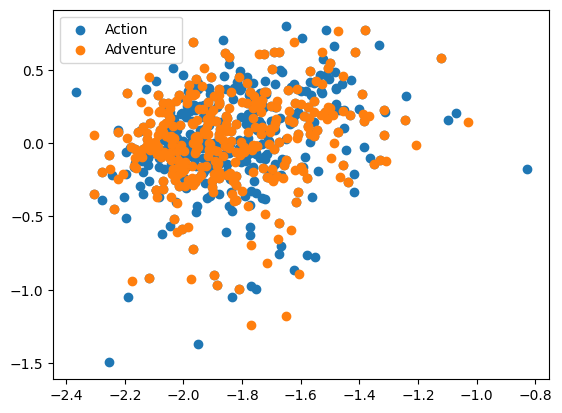

In [ ]:
genres = ["Action", "Adventure"]
fig = plt.figure()
ax1 = fig.add_subplot(111)
for genre in genres:
    to_viz_np = []
    points, titles = getGenre(genre)
    for i in points:
        to_viz_np.append(approx_V[:,i])
    
    to_viz_np = np.array(to_viz_np)
    to_viz_df = pd.DataFrame(to_viz_np, columns = ['x', 'y'])
    ax1.scatter(to_viz_df['x'],to_viz_df['y'], label = genre)
plt.legend(loc='upper left')

<matplotlib.legend.Legend>

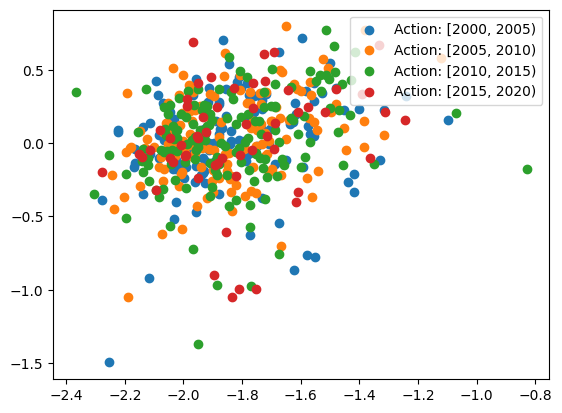

In [ ]:
years = [2000,2005,2010,2015,2020]
genre = "Action"
fig = plt.figure()
ax1 = fig.add_subplot(111)
for y in range(len(years)-1):
    to_viz_np = []
    points, titles = getYearRange(years[y], years[y+1])
    points2, titles2 = getGenre(genre)
    
    points = intersection(points, points2)
    titles = intersection(titles, titles2)
    
    
    for i in points:
        to_viz_np.append(approx_V[:,i])
    
    to_viz_np = np.array(to_viz_np)
    to_viz_df = pd.DataFrame(to_viz_np, columns = ['x', 'y'])
    ax1.scatter(to_viz_df['x'],to_viz_df['y'], label = genre + ": ["+str(years[y])+", "+str(years[y+1])+")")
plt.legend(loc='upper right')

<matplotlib.legend.Legend>

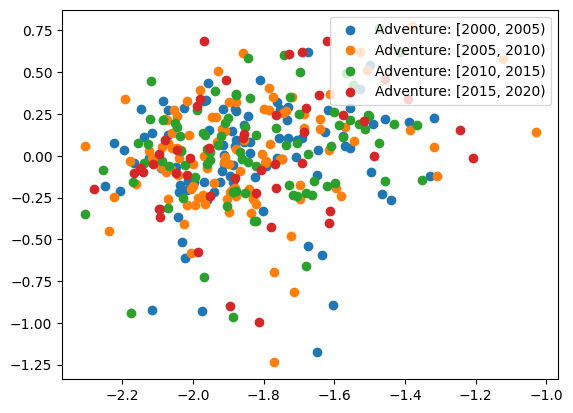

In [ ]:
years = [2000,2005,2010,2015,2020]
genre = "Adventure"
fig = plt.figure()
ax1 = fig.add_subplot(111)
for y in range(len(years)-1):
    to_viz_np = []
    points, titles = getYearRange(years[y], years[y+1])
    points2, titles2 = getGenre(genre)
    
    points = intersection(points, points2)
    titles = intersection(titles, titles2)
    
    
    for i in points:
        to_viz_np.append(approx_V[:,i])
    
    to_viz_np = np.array(to_viz_np)
    to_viz_df = pd.DataFrame(to_viz_np, columns = ['x', 'y'])
    ax1.scatter(to_viz_df['x'],to_viz_df['y'], label = genre + ": ["+str(years[y])+", "+str(years[y+1])+")")
plt.legend(loc='upper right')



<matplotlib.legend.Legend>

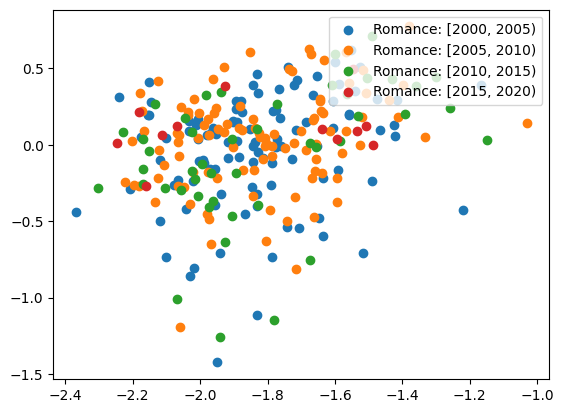

In [ ]:
years = [2000,2005,2010,2015,2020]
genre = "Romance"
fig = plt.figure()
ax1 = fig.add_subplot(111)
for y in range(len(years)-1):
    to_viz_np = []
    points, titles = getYearRange(years[y], years[y+1])
    points2, titles2 = getGenre(genre)
    
    points = intersection(points, points2)
    titles = intersection(titles, titles2)
    
    
    for i in points:
        to_viz_np.append(approx_V[:,i])
    
    to_viz_np = np.array(to_viz_np)
    to_viz_df = pd.DataFrame(to_viz_np, columns = ['x', 'y'])
    ax1.scatter(to_viz_df['x'],to_viz_df['y'], label = genre + ": ["+str(years[y])+", "+str(years[y+1])+")")
plt.legend(loc='upper right')

<matplotlib.legend.Legend>

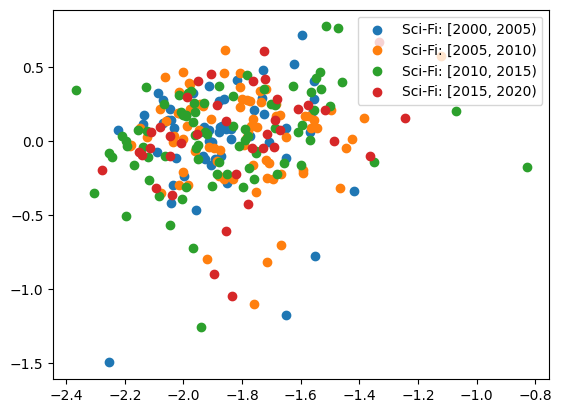

In [ ]:
years = [2000,2005,2010,2015,2020]
genre = "Sci-Fi"
fig = plt.figure()
ax1 = fig.add_subplot(111)
for y in range(len(years)-1):
    to_viz_np = []
    points, titles = getYearRange(years[y], years[y+1])
    points2, titles2 = getGenre(genre)
    
    points = intersection(points, points2)
    titles = intersection(titles, titles2)
    
    
    for i in points:
        to_viz_np.append(approx_V[:,i])
    
    to_viz_np = np.array(to_viz_np)
    to_viz_df = pd.DataFrame(to_viz_np, columns = ['x', 'y'])
    ax1.scatter(to_viz_df['x'],to_viz_df['y'], label = genre + ": ["+str(years[y])+", "+str(years[y+1])+")")
plt.legend(loc='upper right')